#ЛР №7

Основные понятия ООП. Наследование. Полиморфизм.

#Основное задание




Написать базовый класс BaseProcessing, который предоствляет интерфейс для обработки данных (сигналы и изображения).

В классе BaseProcessing реализовать следующие абстрактные методы:

**Интерфейс BaseProcessing**

* `_filtering()` — осуществляет фильтрацию (абстрактный метод).
* `visualize()` — визуализирует сигнал/изображение (абстрактный метод).
* `get_shape()` — возвращает размерность (абстрактный метод).
* `feature_extraction()` — возвращает вектор признаков (абстрактный метод).


Класс SignalProcessing наследует BaseProcessing и переопределяет его методы

**Интерфейс SignalProcessing** (код для реализации отдельных методов ниже)

* _конструктор_ — принимает на вход путь к файлу и создает соответствующие поля
* `_filtering(signal)` — осуществляет фильтрацию сигнала (возвращает отфильтрованный сигнал).
* `visualize()` — визуализирует сигнал.
* `get_shape()` — возвращает длину сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов (попарных расстояний между пиками) и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _filtering и _signal_find_peak.
* `feature_extraction()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде списка - вектор признаков). В этом методе вызывается метод _calculate_RR_intervals.

Класс ImageProcessing наследует BaseProcessing и переопределяет его методы

**Интерфейс ImageProcessing** (код для реализации отдельных методов из предыдущей лабораторной)

* _конструктор_ — принимает на вход путь к файлу и создает соответствующие поля
* `_filtering(image)` — применяет фильтр Гаусса к изображению (возвращает отфильтрованное изображение).
* `visualize()` — визуализирует изображение.
* `get_shape()` — возвращает размерность изображения.
* `_create_gabor_filter(parameters)` — создает и возвращает фильтр Габора с заданными параметрами.
* `feature_extraction()` — применяет _filtering() к изображению, считает признаки с _create_gabor_filter(parameters)и возвращает вектор признаков: среднее и дисперсию по изображению.

*можно добавить свои методы


Изображение и синал находятся в папке

<ipython-input-30-df7c83d1a7de>:6: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


1.1. Размерность сигнала:  20000
1.2. График сигнала: 


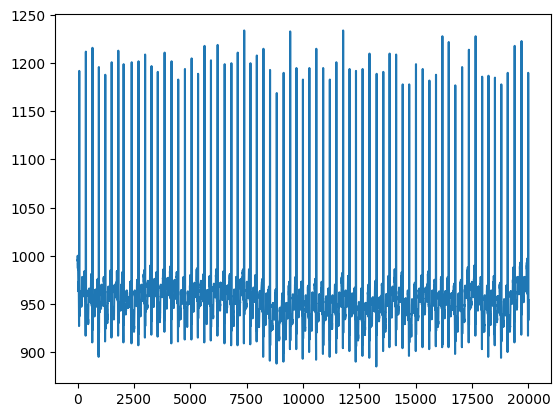

1.3. График отфильтрованного сигнала: 


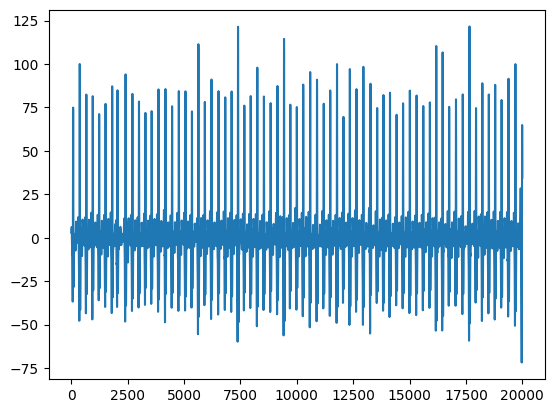

1.4. Точки максимума сигнала:  [77, 370, 663, 947, 1231, 1515, 1809, 2045, 2403, 2706, 2998, 3283, 3560, 3863, 4171, 4466, 4765, 5060, 5347, 5634, 5918, 6214, 6527, 6824, 7106, 7391, 7670, 7953, 8246, 8539, 8837, 9141, 9431, 9710, 9998, 10282, 10591, 10894, 11192, 11480, 11781, 12066, 12350, 12645, 12950, 13267, 13562, 13842, 14131, 14423, 14711, 15011, 15310, 15607, 15900, 16183, 16465, 16755, 17058, 17358, 17657, 17947, 18227, 18514, 18796, 19081, 19388, 19693, 19926, 19992]
1.5. Длины RR интервалов:  [293, 293, 284, 284, 284, 294, 236, 358, 303, 292, 285, 277, 303, 308, 295, 299, 295, 287, 287, 284, 296, 313, 297, 282, 285, 279, 283, 293, 293, 298, 304, 290, 279, 288, 284, 309, 303, 298, 288, 301, 285, 284, 295, 305, 317, 295, 280, 289, 292, 288, 300, 299, 297, 293, 283, 282, 290, 303, 300, 299, 290, 280, 287, 282, 285, 307, 305, 233, 66]
1.6. Статистические характеристики RR интервалов: 
Cредняя длина RR-интервала:  288.6231884057971
СКО RR-интервала:  31.077323597890175
Минимальна

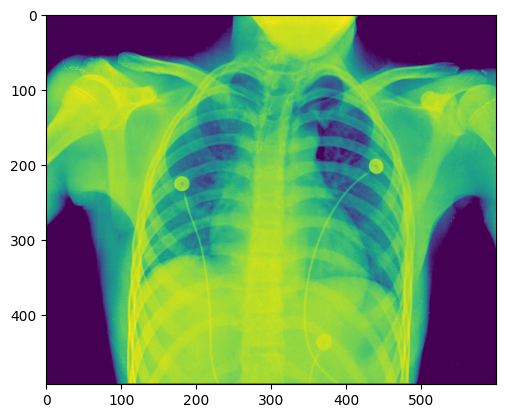

2.3. Отфильтрованное фильтром Гаусса изображение: 


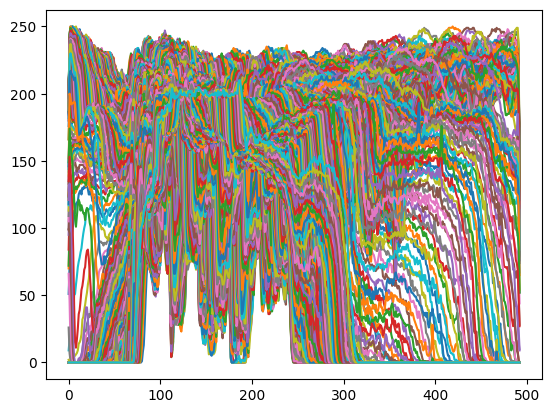

2.4. Применение фильтра Габора: 


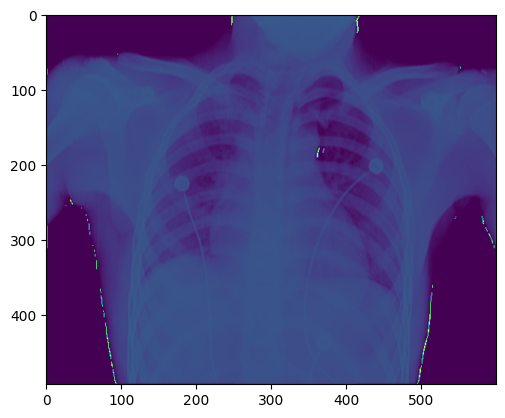

Вектор признаков: 
Среднее значение: 41.113566599053414
Дисперсия по изображению:  670.1179849805205


In [30]:
#Необходимые модули и функции
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks
from abc import ABC, abstractmethod

class BaseProcessing:
  @abstractmethod
  def _filtering(self):
    pass

  @abstractmethod
  def visualize(self):
    pass

  @abstractmethod
  def get_shape(self):
    pass

  @abstractmethod
  def feature_extraction(self):
    pass


class SignalProcessing(BaseProcessing):
  def __init__(self, dict):
    self.path_signal = dict['signal']
    self.parameters = dict['parameters']
    self.signal = pd.read_csv(self.path_signal)

  def visualize(self):
    plt.plot(self.signal['MLII'])
    plt.show()

  def get_shape(self):
    return self.signal['MLII'].shape[0]

  def _filtering(self):
    filtered = hp.filter_signal(self.signal['MLII'], **self.parameters['filtration'])
    return filtered

  def plot_signal_filtration(self):
    filtered=self._filtering()
    plt.plot(filtered)
    plt.show()

  def _signal_find_peaks(self):
    filtered=self._filtering()
    peaks, _ = find_peaks(filtered, **self.parameters['peaks'])
    return list(peaks)

  def _calculate_RR_intervals(self):
    peaks=self._signal_find_peaks()
    RR_intervals=[]
    for i in range(len(peaks)-1):
      RR_intervals.append(peaks[i+1]-peaks[i])
    return RR_intervals

  def feature_extraction(self):
    RR_intervals = self._calculate_RR_intervals()
    statistics_ekg=[]
    statistics_ekg.append(np.mean(RR_intervals))
    statistics_ekg.append(np.std(RR_intervals))
    statistics_ekg.append(min(RR_intervals))
    statistics_ekg.append(max(RR_intervals))
    return statistics_ekg


class  ImageProcessing(BaseProcessing):
  def __init__(self, dict):
    self.path_image = dict['image']
    self.parameters = dict['parameters']
    self.image = cv2.imread(self.path_image, cv2.IMREAD_GRAYSCALE)

  def visualize(self):
    plt.imshow(self.image)
    plt.show()

  def get_shape(self):
    return self.image.shape

  def _filtering(self):
    image_filtered = ndi.gaussian_filter(self.image, .5)
    return image_filtered

  def plot_image_filtration(self):
    image_filtered=self._filtering()
    plt.plot(image_filtered)
    plt.show()

  def _create_gabor_filter(self):
    kernel = np.real(gabor_kernel(**self.parameters))
    return kernel

  def feature_extraction(self):
    image_filtered=self._filtering()
    kernel=self._create_gabor_filter()
    conv = ndi.convolve(image_filtered, kernel, mode='wrap')
    return conv

  def vector(self):
    conv=self.feature_extraction()
    feats = [conv.mean(), conv.var()]
    return feats

  def plot_image_gabor(self):
    conv=self.feature_extraction()
    plt.imshow(conv)
    plt.show()





ekg = {
       'signal': '/content/drive/MyDrive/Colab Notebooks/Seminar7/ecg.csv',
       'parameters':{
        'filtration': {
            'cutoff': [0.75, 3.5],
            'sample_rate': 100,
            'order': 3,
            'filtertype': 'bandpass'},
        'peaks': {
            'height': 20}}
     }

image = {'image': '/content/drive/MyDrive/Colab Notebooks/Seminar7/chest-xray.tif',
         'parameters':{'frequency': 0.25,
                      'theta' : np.pi,
                      'sigma_x' : 1,
                      'sigma_y' : 1 }
         }


ekg=SignalProcessing(ekg)
print("1.1. Размерность сигнала: ", ekg.get_shape())
print("1.2. График сигнала: ")
ekg.visualize()
print("1.3. График отфильтрованного сигнала: ")
ekg.plot_signal_filtration()
print("1.4. Точки максимума сигнала: ", ekg._signal_find_peaks())
print("1.5. Длины RR интервалов: ", ekg._calculate_RR_intervals())
print("1.6. Статистические характеристики RR интервалов: \nCредняя длина RR-интервала: ", ekg.feature_extraction()[0])
print("СКО RR-интервала: ", ekg.feature_extraction()[1])
print("Минимальная длина RR-интервала: ", ekg.feature_extraction()[2])
print("Максимальная длина RR-интервала:", ekg.feature_extraction()[3])


image=ImageProcessing(image)
print("\n2.1. Размерность изображения: ", image.get_shape())
print("2.2. Визуализация изображения: ")
image.visualize()
print("2.3. Отфильтрованное фильтром Гаусса изображение: ")
image.plot_image_filtration()
print("2.4. Применение фильтра Габора: ")
image.plot_image_gabor()
print("Вектор признаков: \nСреднее значение:", image.vector()[0])
print("Дисперсия по изображению: ", image.vector()[1])



In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Для сигнала

In [ ]:
#загрузка сигнала из .csv файла с pandas
df = pd.read_csv('path_to_ecg/ecg.csv')
plt.plot(df['MLII'])
plt.show()

In [ ]:
#размерность
df['MLII'].shape

In [ ]:
#фильтрация сигнала с библиотекой heartpy
filtered = hp.filter_signal(df['MLII'], cutoff = [0.75, 3.5], sample_rate = 100, order = 3, filtertype='bandpass')
plt.plot(filtered)
plt.show()

In [ ]:
#поиск точек максимума с библиотекой scipy
peaks, _ = find_peaks(filtered, height=20)
plt.plot(filtered)
plt.plot(peaks, filtered[peaks], "ecg")
plt.show()

###Для изображения

In [ ]:
#Создание фильтра Габора
frequency = 0.25
theta = np.pi
sigma = 1
kernel = np.real(gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma))
plt.imshow(kernel)
plt.show()

In [ ]:
#Чтение изображения
image = cv2.imread('path_to_image', cv2.IMREAD_GRAYSCALE)
#Применение филтра Гаусса к изображению
image_filtered = ndi.gaussian_filter(image, .5)

In [ ]:
#Размерность изображения
image.shape

In [ ]:
#свертка изображения с фильтром Габора
conv = ndi.convolve(image_filtered, kernel, mode='wrap')
plt.imshow(conv)
plt.show()

In [ ]:
#Расчет вертора признаков изображения
feats = [conv.mean(), conv.var()]

#Задача * "Классификатор"

В классе BaseProcessing реализовать метод:
* `get_predict(features, etalons_features)` — метод, в котором осуществляется классификация на основе рассчета Евклидова расстояния между features изображения или сигнала и эталонными значениями признаков (etalons_features) каждого класса изображений или сигналов. Классификация осуществляется следующим образом: полученные Евклидовы расстояния ранжируются в порядке возрастания. Чем меньше Евклидово расстояние, тем более похожим на эталонное изображение считается наше изображение. Выбирается индекс соответствуюших эталонных признаков, которые и являются номером класса. Эталонных класса 2, т.е. возвращается 0 или 1, т.е. класс к которому относится изображение/сигнал.

Классы SignalProcessing и ImageProcessing наследуют реализованный метод get_predict.

Продемонстрировать вызов метода в классах

Эталонные признаки (etalons_features) могут подаются в формате списка:
[[1, 8], [5, 0.5]] -> тогда класс вернуть по индексу

или в формате словаря [{'features': [1, 8], 'class': 0}, {'features': [5, 0.5], 'class': 1}]

#Задача ***  "Словарь-директория" в папке

